In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.selfcal import generate_catalog, OffsetSys, OffsetSNR
import sqlite3
from rubin_sim.data import get_baseline

from rubin_sim.utils import healbin
import healpy as hp

In [2]:
ss = np.load('solved_stars.npz')['result']

In [3]:
sp = np.load('solved_patches.npz')['result']

In [4]:
ss['id']

array([      2,       3,       4, ..., 1337078, 1337079, 1337080])

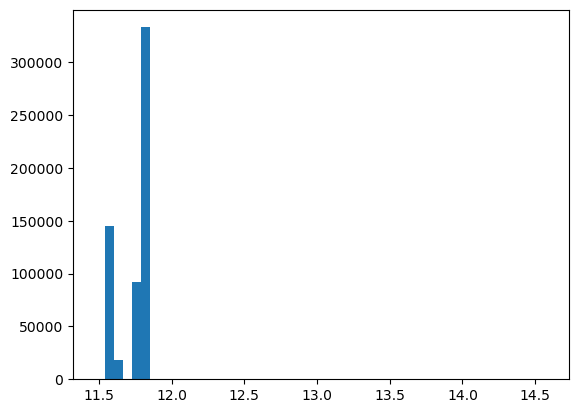

In [5]:
_temp = plt.hist(sp['zp'], bins=50)

In [6]:
filter_name = "r"
con = sqlite3.connect("msrgb_1e6.sqlite")
stars_df = pd.read_sql("select id,ra,decl,%smag from stars;" % filter_name, con)
con.close()

# what is the right way to do this? There's gotta be a better way!
names =['id', 'ra', 'decl', '%smag' % filter_name]
types = [int, float, float, float]
stars = np.empty(stars_df.shape[0], dtype=list(zip(names, types)))
for key in names:
    stars[key] = stars_df[key].values


In [7]:
stars_trimmed = stars[np.in1d(stars['id'], ss['id'])]

In [8]:
stars_trimmed

array([(      2,   0.368681, -89.0753  , 17.0235),
       (      3,   2.44785 , -89.4834  , 17.0241),
       (      4,   5.25501 , -89.8479  , 17.046 ), ...,
       (1337078, 337.148   ,  -0.788291, 17.0773),
       (1337079, 345.546   ,  -0.758393, 18.3683),
       (1337080, 353.166   ,  -0.94849 , 17.9173)],
      dtype=[('id', '<i8'), ('ra', '<f8'), ('decl', '<f8'), ('rmag', '<f8')])

In [9]:
ss

array([(      2, 5.2445699 ), (      3, 5.21624873),
       (      4, 5.29583942), ..., (1337078, 5.2911711 ),
       (1337079, 6.57069399), (1337080, 6.12845924)],
      dtype=[('id', '<i8'), ('fit_mag', '<f8')])

In [10]:
resid = stars_trimmed['%smag' % filter_name] - ss['fit_mag']
resid = resid - np.median(resid)

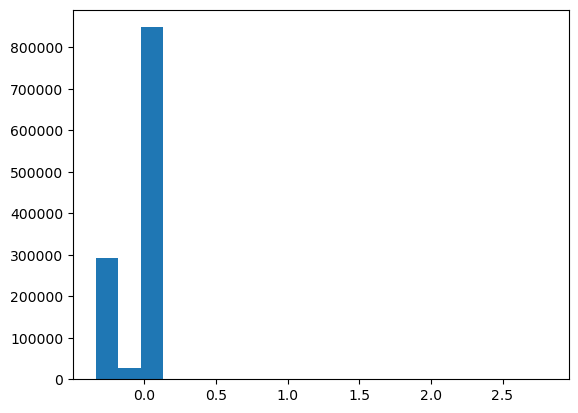

In [11]:
_temp = plt.hist(resid, bins=20)

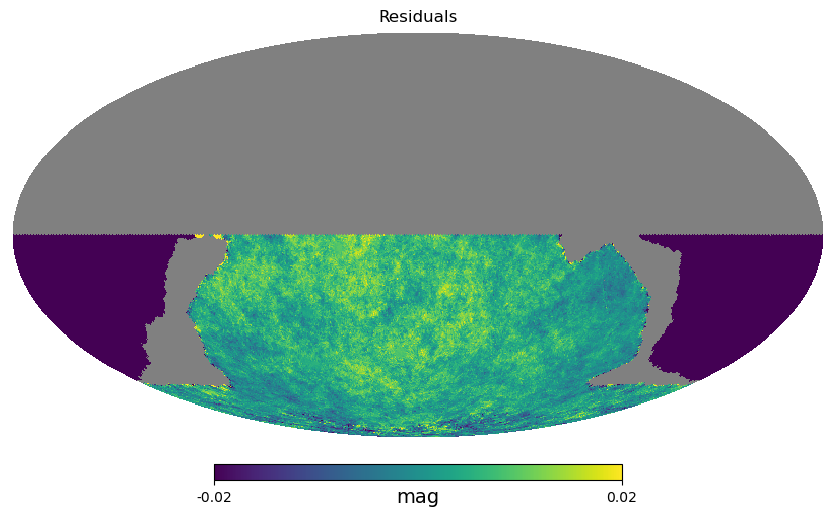

In [15]:
resid_map = healbin(stars_trimmed["ra"], stars_trimmed["decl"], resid, 128, reduce_func=np.mean)
hp.mollview(resid_map, min=-0.02, max=0.02, title='Residuals', unit='mag')

In [13]:
np.std(resid)

0.09367469252250248

In [18]:
ack = np.load('test_generate.npz')['observed_stars']

In [19]:
ack

array([(1081803,    1347, 20.7331502 , 0.01144245, 20.7157,   7.47363, -4.51825e+01),
       ( 296856,    1346, 17.00879826, 0.0050112 , 17.0131,   7.3224 , -4.46509e+01),
       ( 284659,    1347, 17.21148765, 0.00501625, 17.1924,   7.41323, -4.51173e+01),
       ...,
       ( 996107, 3472685, 17.08517091, 0.00500625, 17.0619, 137.562  , -1.46993e-02),
       ( 996120, 3472686, 17.04530178, 0.00500581, 17.08  , 137.095  , -1.33471e-02),
       (1235295, 3472685, 20.67718464, 0.00845348, 20.6676, 137.345  , -4.03611e-02)],
      dtype=[('id', '<i8'), ('patch_id', '<i8'), ('observed_mag', '<f8'), ('mag_uncert', '<f8'), ('rmag', '<f8'), ('ra', '<f8'), ('decl', '<f8')])

In [38]:
star_map = healbin(ack['ra'], ack['decl'], ack['ra']*0+1, reduce_func=np.sum, nside=128)


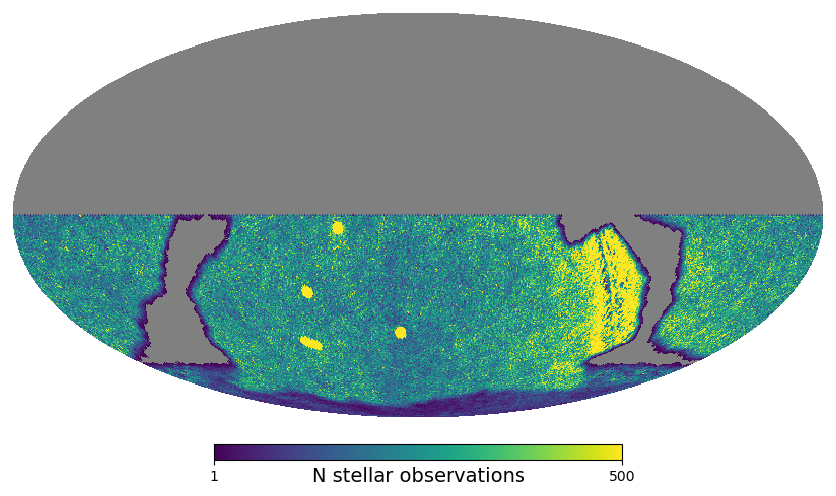

In [43]:
hp.mollview(star_map, min=1, max=500, title='', unit='N stellar observations')

In [40]:
star_map

array([-1.6375e+30, -1.6375e+30, -1.6375e+30, ...,  1.3800e+02,
        5.6000e+01,  7.7000e+01])

In [44]:
star_map.size

196608